In [3]:
!ls
!pwd

sample_data
/content


In [4]:
!python --version
!cat /etc/issue.net
!head /proc/cpuinfo
!df -h



Python 3.6.9
Ubuntu 18.04.3 LTS
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   32G   72G  31% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.9G     0  5.9G   0% /dev/shm
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1       114G   33G   82G  29% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


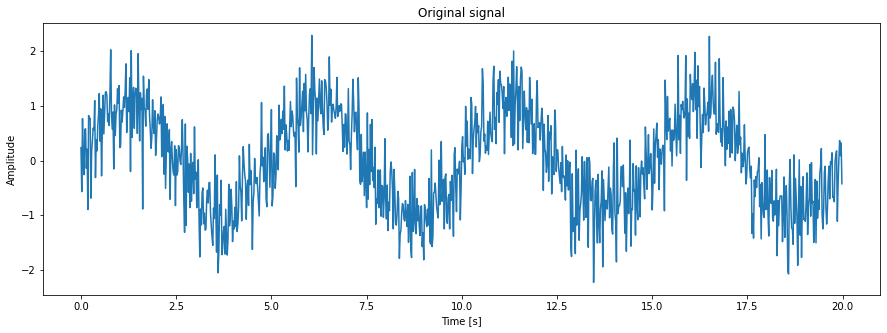

In [30]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt


# Seed the random number generator
np.random.seed(1234)

# samplerate 1/0.02 = 550
time_step = 0.02

# 
# Frequency = 1/5 = 0.2 Hz 
period = 5.

# seconds for sampling (0~20 Secs)  
time_vec = np.arange(0, 20, time_step)

# noise rate 0.5
noise_rate = 0.5

# signal and noise with random 
sig = (np.sin(2 * np.pi / period * time_vec) + noise_rate * np.random.randn(time_vec.size))

plt.figure(figsize=(15, 5))
plt.title(r"Original signal")
# x: time_vec 
# y: sig 
#plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, sig)

plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

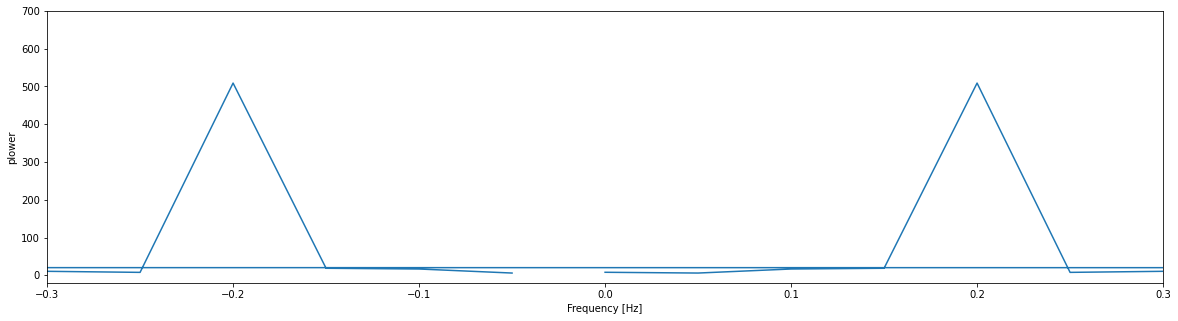

In [48]:
# fourier transform and frequency domain
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(20, 5))
plt.plot(sample_freq, power)

# x,y limite for scaleing up 
plt.xlim(-0.3,0.3)
plt.ylim(-20,700)

# Frequency -0.2  +0.2 Hz 
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
plt.show()


In [53]:
print(sample_freq)
print(power)

[  0.     0.05   0.1    0.15   0.2    0.25   0.3    0.35   0.4    0.45
   0.5    0.55   0.6    0.65   0.7    0.75   0.8    0.85   0.9    0.95
   1.     1.05   1.1    1.15   1.2    1.25   1.3    1.35   1.4    1.45
   1.5    1.55   1.6    1.65   1.7    1.75   1.8    1.85   1.9    1.95
   2.     2.05   2.1    2.15   2.2    2.25   2.3    2.35   2.4    2.45
   2.5    2.55   2.6    2.65   2.7    2.75   2.8    2.85   2.9    2.95
   3.     3.05   3.1    3.15   3.2    3.25   3.3    3.35   3.4    3.45
   3.5    3.55   3.6    3.65   3.7    3.75   3.8    3.85   3.9    3.95
   4.     4.05   4.1    4.15   4.2    4.25   4.3    4.35   4.4    4.45
   4.5    4.55   4.6    4.65   4.7    4.75   4.8    4.85   4.9    4.95
   5.     5.05   5.1    5.15   5.2    5.25   5.3    5.35   5.4    5.45
   5.5    5.55   5.6    5.65   5.7    5.75   5.8    5.85   5.9    5.95
   6.     6.05   6.1    6.15   6.2    6.25   6.3    6.35   6.4    6.45
   6.5    6.55   6.6    6.65   6.7    6.75   6.8    6.85   6.9    6.95
   7. 

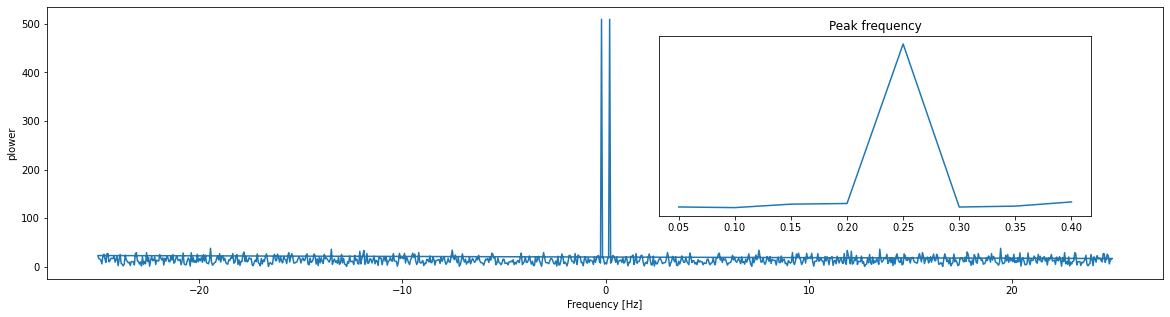

In [42]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(20, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])
plt.show()
# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


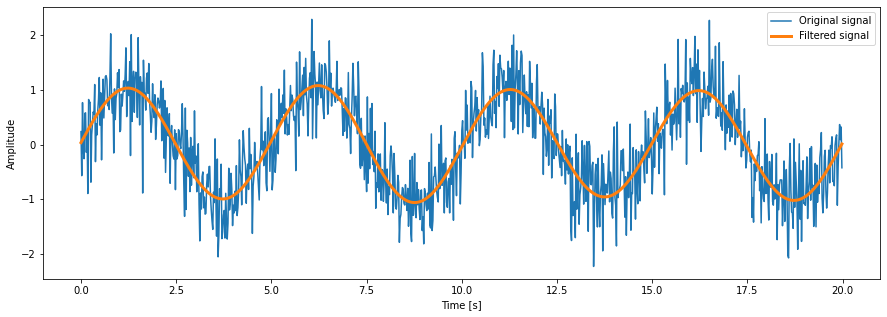

In [51]:

high_freq_fft = sig_fft.copy()

high_freq_fft[np.abs(sample_freq) > peak_freq] = 0

filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(15, 5))
# noise signal 
plt.plot(time_vec, sig, label='Original signal')
# filter signal 
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')

plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')
plt.show()

http://scipy-lectures.org/intro/scipy/auto_examples/plot_fftpack.html